# Location selection for a drilling site

Suppose you work for the mining company "GlavRosGosNeft". You need to decide where to drill a new well.

You are provided with oil samples from three regions: 10,000 deposits in each region, where the quality of the oil and the volume of its reserves were measured. Build a machine learning model that will help determine the region where production will bring the greatest profit. Analyze potential profits and risks using the Bootstrap technique.

Steps for selecting a location:

- In the selected region, search for deposits and determine the values of their features.
- Build a model and estimate the volume of reserves.
- Select deposits with the highest estimated values. The number of deposits depends on the company's budget and the cost of developing one well.
- Profit is equal to the total profit from the selected deposits.

## Data Loading and Preparation

### Importing libraries 

In [1]:
import pandas as pd
import seaborn as sns
import random
import numpy as np
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import precision_score, recall_score, confusion_matrix
from sklearn.dummy import DummyClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.impute import SimpleImputer
from sklearn.utils import shuffle
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.datasets import load_boston
from sklearn.inspection import permutation_importance
from sklearn.metrics import precision_recall_curve
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error

### Loading files/Exploring datasets

In [2]:
try:
    data = pd.read_csv('/datasets/geo_data_0.csv')
except:
    data = pd.read_csv('https://code.s3.yandex.net//datasets/geo_data_0.csv')

In [3]:
data.head()

,id,f0,f1,f2,product
0,txEyH,0.705745,-0.497823,1.221170,105.280062
1,2acmU,1.334711,-0.340164,4.365080,73.037750
2,409Wp,1.022732,0.151990,1.419926,85.265647
3,iJLyR,-0.032172,0.139033,2.978566,168.620776
4,Xdl7t,1.988431,0.155413,4.751769,154.036647


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


In [5]:
data.isna().sum()

id         0
f0         0
f1         0
f2         0
product    0
dtype: int64

In [6]:
try:
    data_1 = pd.read_csv('/datasets/geo_data_1.csv')
except:
    data_1 = pd.read_csv('https://code.s3.yandex.net//datasets/geo_data_1.csv')

In [7]:
data_1.head()

,id,f0,f1,f2,product
0,kBEdx,-15.001348,-8.276000,-0.005876,3.179103
1,62mP7,14.272088,-3.475083,0.999183,26.953261
2,vyE1P,6.263187,-5.948386,5.001160,134.766305
3,KcrkZ,-13.081196,-11.506057,4.999415,137.945408
4,AHL4O,12.702195,-8.147433,5.004363,134.766305


In [8]:
data_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


In [9]:
data_1.isna().sum()

id         0
f0         0
f1         0
f2         0
product    0
dtype: int64

In [10]:
try:
    data_2 = pd.read_csv('datasets/geo_data_2.csv')
except:
    data_2 = pd.read_csv('https://code.s3.yandex.net//datasets/geo_data_2.csv')

In [11]:
data_2.head()

,id,f0,f1,f2,product
0,fwXo0,-1.146987,0.963328,-0.828965,27.758673
1,WJtFt,0.262778,0.269839,-2.530187,56.069697
2,ovLUW,0.194587,0.289035,-5.586433,62.871910
3,q6cA6,2.236060,-0.553760,0.930038,114.572842
4,WPMUX,-0.515993,1.716266,5.899011,149.600746


In [12]:
data_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


In [13]:
data_2.isna().sum()

id         0
f0         0
f1         0
f2         0
product    0
dtype: int64

### Looking at feature correlations

#### Data

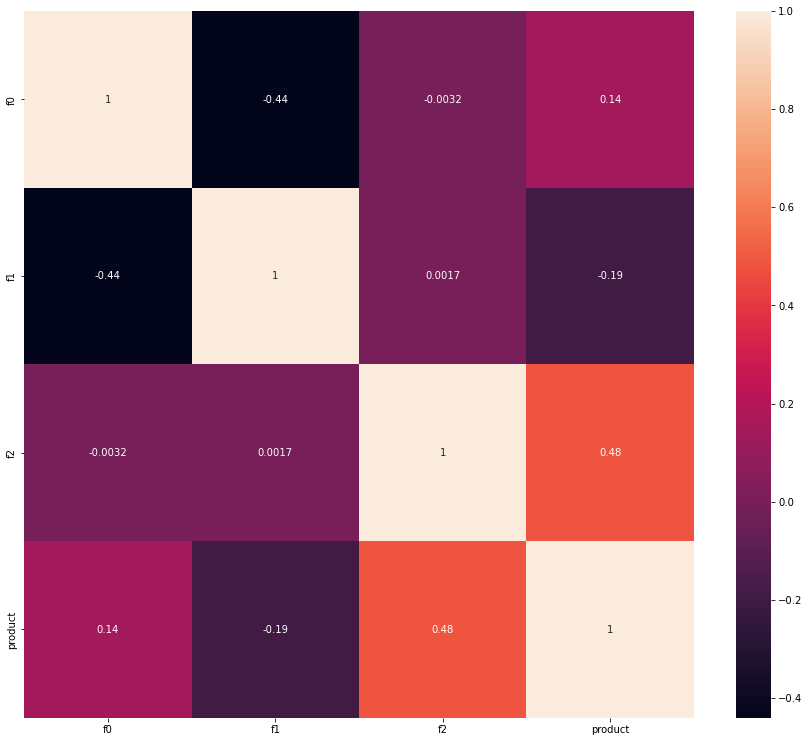

In [14]:
plt.figure(figsize=(15, 13))
sns.heatmap(data.corr(), annot=True);

We observe a correlation of 0.48 between the 'product' and 'f2' features, which could potentially impact the logistic regression model's training.

#### Data_1

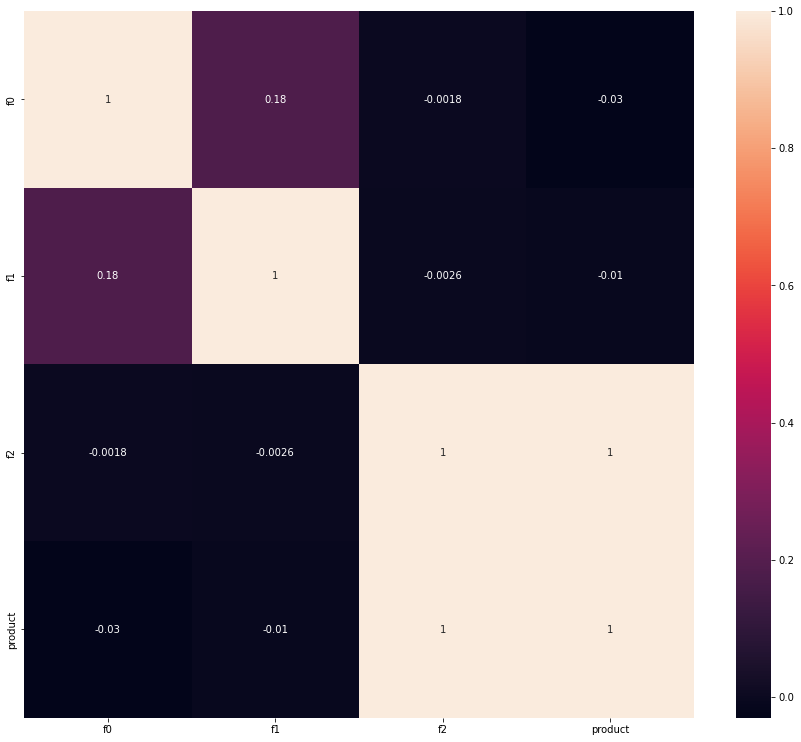

In [15]:
plt.figure(figsize=(15, 13))
sns.heatmap(data_1.corr(), annot=True);

In data_1, there is a strong correlation between product and f1, f2, which equals 1. Such a correlation will strongly impact the training of a linear regression model. As there are very few features, it is difficult to say whether or not they should be removed. During the training process, we will observe the indicators, and may remove some features.

#### Data_2

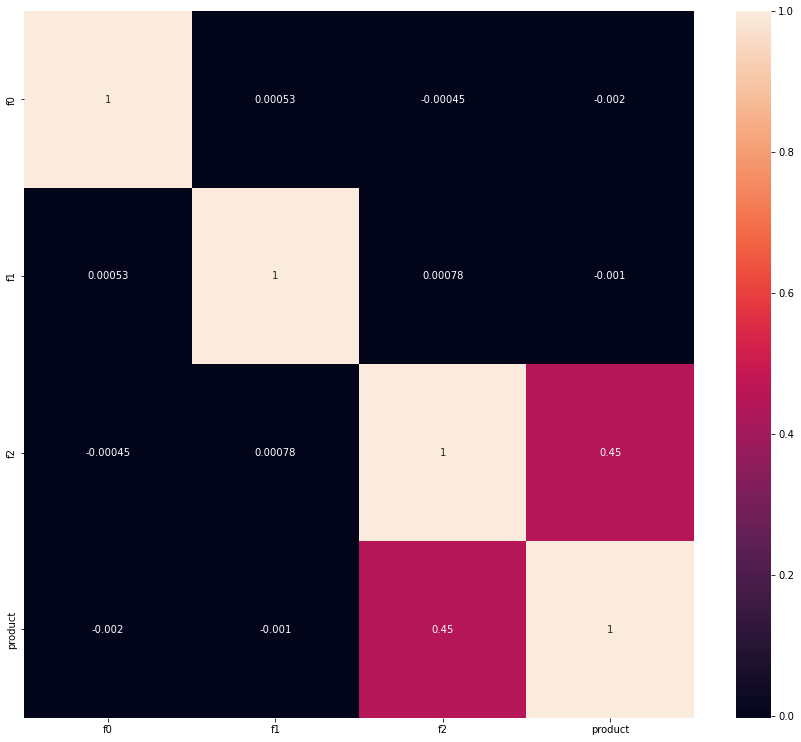

In [16]:
plt.figure(figsize=(15, 13))
sns.heatmap(data_2.corr(), annot=True);

A correlation of 0.45 between "product" and "f2" may have some impact on the logistic regression model training, but it is not a very strong correlation. It's important to consider other factors as well, such as the size of the dataset, the distribution of the data, and the business goals of the model. During the training process, it's recommended to monitor the performance metrics of the model and experiment with different feature combinations to achieve the best results.

### Checking feature types

In [17]:
print(data.dtypes)

id          object
f0         float64
f1         float64
f2         float64
product    float64
dtype: object


In [18]:
print(data_1.dtypes)

id          object
f0         float64
f1         float64
f2         float64
product    float64
dtype: object


In [19]:
print(data_2.dtypes)

id          object
f0         float64
f1         float64
f2         float64
product    float64
dtype: object


### Drop columns

In [20]:
data = data.drop(['id'], axis=1)
print(data)

             f0        f1        f2     product
0      0.705745 -0.497823  1.221170  105.280062
1      1.334711 -0.340164  4.365080   73.037750
2      1.022732  0.151990  1.419926   85.265647
3     -0.032172  0.139033  2.978566  168.620776
4      1.988431  0.155413  4.751769  154.036647
...         ...       ...       ...         ...
99995  0.971957  0.370953  6.075346  110.744026
99996  1.392429 -0.382606  1.273912  122.346843
99997  1.029585  0.018787 -1.348308   64.375443
99998  0.998163 -0.528582  1.583869   74.040764
99999  1.764754 -0.266417  5.722849  149.633246

[100000 rows x 4 columns]


In [21]:
data_1 = data_1.drop(['id'], axis=1)
print(data_1)

              f0         f1        f2     product
0     -15.001348  -8.276000 -0.005876    3.179103
1      14.272088  -3.475083  0.999183   26.953261
2       6.263187  -5.948386  5.001160  134.766305
3     -13.081196 -11.506057  4.999415  137.945408
4      12.702195  -8.147433  5.004363  134.766305
...          ...        ...       ...         ...
99995   9.535637  -6.878139  1.998296   53.906522
99996 -10.160631 -12.558096  5.005581  137.945408
99997  -7.378891  -3.084104  4.998651  137.945408
99998   0.665714  -6.152593  1.000146   30.132364
99999  -3.426139  -7.794274 -0.003299    3.179103

[100000 rows x 4 columns]


In [22]:
data_2 = data_2.drop(['id'], axis=1)
print(data_2)

             f0        f1        f2     product
0     -1.146987  0.963328 -0.828965   27.758673
1      0.262778  0.269839 -2.530187   56.069697
2      0.194587  0.289035 -5.586433   62.871910
3      2.236060 -0.553760  0.930038  114.572842
4     -0.515993  1.716266  5.899011  149.600746
...         ...       ...       ...         ...
99995 -1.777037  1.125220  6.263374  172.327046
99996 -1.261523 -0.894828  2.524545  138.748846
99997 -1.199934 -2.957637  5.219411  157.080080
99998 -2.419896  2.417221 -5.548444   51.795253
99999 -2.551421 -2.025625  6.090891  102.775767

[100000 rows x 4 columns]


## Training and testing the model

### We trained the models, split the datasets, and calculated RMSE, score, and average predicted reserve using a loop.

In [23]:
rmse_list = []
predictions_list = []
score_list = []
target = []
predictions_df = pd.DataFrame()
target_df = pd.DataFrame()

for i,n in zip([data,data_1,data_2],range(3)):
    X = i.drop(['product'], axis=1)
    y = i['product']
    X_train, X_valid, y_train, y_valid = train_test_split(
        X, y, random_state=12345, test_size=0.25) 
    
    lr = LinearRegression()
    lr.fit(X_train, y_train)
    predictions = lr.predict(X_valid)
    rmse = mean_squared_error(y_valid, predictions)**0.5
    rmse_list.append(rmse)
    predictions_list.append(predictions.mean())
    score_list.append(lr.score(X_train,y_train))
    target.append(i['product'].mean())
    target_df[n] = y_valid
    predictions_df[n] = predictions

In [24]:
target_df = target_df.reset_index(drop=True)
scorelist = pd.DataFrame(
    data=[rmse_list, score_list, predictions_list, target], 
    index=['RMSE','SCORE','PREDICTED MEAN', 'TARGET MEAN'], 
    columns=['region 1','region 2','region 3'])
scorelist

,region 1,region 2,region 3
RMSE,37.579422,0.893099,40.029709
SCORE,0.274239,0.999625,0.196614
PREDICTED MEAN,92.592568,68.728547,94.965046
TARGET MEAN,92.500000,68.825000,95.000000


Using a loop, we split the data into 75:25 train-test sets and outputted the RMSE, model quality score, and saved the predictions in a variable. It can be concluded that the first and third dataset splits are of low quality (low score, relatively high RMSE).

## The preparation for profit calculation

### Key values for calculations

In [25]:
BUDGET = 10_000_000_000 # The budget for developing oil wells in the region is 10 billion rubles
INCOME_PER_BARREL = 450000 # The income from each unit of product is 450,000 rubles
INCOME_PER_ITEM = 450 # The income from one barrel of oil is 450 rubles
OILFIELDS= 500 # During exploration, 500 points are studied
BEST_OILFIELDS = 200 # 200 best wells for development

### Calculating the sufficient volume of raw materials for profitable development

In [26]:
COSTS = BUDGET/BEST_OILFIELDS #Cost per oil well for development
PRODUCT_VOLUME = BUDGET/(200 * INCOME_PER_BARREL) #200 - number of oil wells
print('The cost of developing an oil well:', COSTS)
print('The sufficient volume of raw materials for profitable development:', PRODUCT_VOLUME)

The cost of developing an oil well: 50000000.0
The sufficient volume of raw materials for profitable development: 111.11111111111111


The sufficient volume of raw materials for profitable development of a new oil well is 111 thousand barrels. The cost of developing an oil well is 50 million rubles, which is higher than the average reserves of raw materials. In the first region, the average reserves are 92 thousand barrels, in the second - 68, and in the third - 94. The variables were made constant.

### The function for calculating profits by regions

I randomly select 500 points from the validation set features, then the model makes predictions on them, from these predictions I choose the 200 best values. After that, I sum up the 200 values and calculate the profit.

In [27]:
def revenue(target, probabilities):
    probabilities_sorted = probabilities.sort_values(ascending=False)
    selected = target[probabilities_sorted.index][:200]
    
    return INCOME_PER_BARREL * sum(selected) - (BUDGET)

In [28]:
print('Profit of the first region: {:.2f} billion rubles'.format(revenue(target_df[0], predictions_df[0])/109))
print('Profit of the second region: {:.2f} billion rubles'.format(revenue(target_df[1], predictions_df[1])/109))
print('Profit of the third region: {:.2f} billion rubles'.format(revenue(target_df[2], predictions_df[2])/10**9))

Profit of the first region: 30466293.97 billion rubles
Profit of the second region: 22156758.69 billion rubles
Profit of the third region: 2.71 billion rubles


We obtained a relatively small profit for all regions. The profit is not very high, considering the cost of developing one oil well, which is at least 111 barrels. Let's continue the research to make a clearer conclusion about the choice of region.

## Calculation of profits and risks

#### The first region

In [32]:
state = np.random.RandomState(12345)
revenues = []

for i in range(1000):
    target_subsample = target_df[0].sample(n=500, replace=True, random_state=state)
    probs_subsample = predictions_df[0][target_subsample.index]
    revenues.append(revenue(target_subsample, probs_subsample))

revenues = pd.Series(revenues)
lower = revenues.quantile(0.025)
mean = revenues.mean()
risks = (revenues < 0).mean()
risks_percent = risks * 100
print("Average revenue:", mean/10**9)
print("2.5th percentile:", lower/10**9)
print("Risk: {:.2f}%".format(risks_percent))
final_revenues = []
confidence_interval = (revenues.quantile(0.025), revenues.quantile(0.975))
print('95% confidence interval: ', confidence_interval)
final_revenues.append(('Region 1', mean/109, lower/109, confidence_interval, risks))

Average revenue: 0.42593852691059225
2.5th percentile: -0.10209009483793645
Risk: 6.00%
95% confidence interval:  (-102090094.83793645, 947976353.3583689)


#### The second region

In [33]:
state = np.random.RandomState(12345)
revenues = []

for i in range(1000):
    target_subsample = target_df[1].sample(n=500, replace=True, random_state=state)
    probs_subsample = predictions_df[1][target_subsample.index]
    revenues.append(revenue(target_subsample, probs_subsample))

revenues = pd.Series(revenues)
lower = revenues.quantile(0.025)
mean = revenues.mean()
risks = (revenues < 0).mean()
risks_percent = risks * 100
print("Average revenue:", mean/10**9)
print("2.5th percentile:", lower/10**9)
print("Risk: {:.2f}%".format(risks_percent))
final_revenues = []
confidence_interval = (revenues.quantile(0.025), revenues.quantile(0.975))
print('95% confidence interval: ', confidence_interval)

Average revenue: 0.5152227734433129
2.5th percentile: 0.06887322537051702
Risk: 1.00%
95% confidence interval:  (68873225.37051702, 931547591.2570724)


#### The third region

In [34]:
state = np.random.RandomState(12345)
revenues = []

for i in range(1000):
    target_subsample = target_df[2].sample(n=500, replace=True, random_state=state)
    probs_subsample = predictions_df[2][target_subsample.index]
    revenues.append(revenue(target_subsample, probs_subsample))

revenues = pd.Series(revenues)
lower = revenues.quantile(0.025)
mean = revenues.mean()
risks = (revenues < 0).mean()
risks_percent = risks * 100
print("Average revenue:", mean/10**9)
print("2.5th percentile:", lower/10**9)
print("Risk: {:.2f}%".format(risks_percent))
final_revenues = []
confidence_interval = (revenues.quantile(0.025), revenues.quantile(0.975))
print('95% confidence interval:', confidence_interval)

Average revenue: 0.43500836278275656
2.5th percentile: -0.12888054732978535
Risk: 6.40%
95% confidence interval: (-128880547.32978535, 969706954.1802661)


## Conclusions

We analyzed three regions and calculated the cost per well for development and the volume of product at which the costs will be covered. Using the bootstrap technique, we obtained the following values:

- The average profit for the first region is 0.52 billion, the risk of the company going negative when developing this region is 6%.
- The average profit for the second region is 0.52 billion, the risk of the company going negative when developing this region is 1%.
- The average profit for the third region is 0.43 billion, the risk of the company going negative when developing this region is 6.40%.

From these indicators, we can conclude that the safest region for development and minimum risk is the second one. However, the quality of models and predictions remains not high. To ensure accuracy, more data should be studied.



